<a href="https://colab.research.google.com/github/NichareeInt/DADS7203_NLP/blob/main/6620412007_NLP_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import All Libraries**

In [31]:
import nltk
nltk.download('all')
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

# **2. Import Data**

In [41]:
path = 'https://raw.githubusercontent.com/NichareeInt/DADS7203_NLP/refs/heads/main/TaylorSwift%20(1).csv'
df = pd.read_csv(path)
print(df.head())

   Unnamed: 0        Artist                                      Title  \
0           1  Taylor Swift                    A Monster In My Closet!   
1           2  Taylor Swift  ​epiphany (the long pond studio sessions)   
2           3  Taylor Swift                        Dark Blue Tennessee   
3           4  Taylor Swift                            All Night Diner   
4           5  Taylor Swift                     Teardrops on My Guitar   

                                               Album  Year        Date  \
0                                                NaN  2000    1/1/2000   
1  folklore: the long pond studio sessions (from ...  2002  25/11/2002   
2                                  2004-2005 Demo CD  2004    1/1/2004   
3                                   Unreleased Songs  2005    1/1/2005   
4                                       Taylor Swift  2006  24/10/2006   

                                               Lyric  
0  there's a monster in my closet and i don't kno...  


# **3. Cleaning data**

In [42]:
# clean row at 'Lyric' column have null
df_filtered_lyric = df[df['Lyric'].notna()]

# filtered 'Year'
df_before_2016 = df[df['Year'] <= 2015].reset_index(drop=True)
df_after_2015 = df[df['Year'] > 2015].reset_index(drop=True)

# Choose only 'Lyric' column
lyrics_before_2016 = df_before_2016[['Lyric']]
lyrics_after_2015 = df_after_2015[['Lyric']]

# show
lyrics_before_2016.info(), lyrics_after_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyric   184 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyric   151 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


(None, None)

In [43]:
# define 'stopword'
stop_words_nltk = set(stopwords.words("english"))

# delete stopwords function
def remove_stopwords_nltk(lyrics_series, stop_words):
    cleaned_sentences = []
    for row in lyrics_series:
        words = str(row).split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentences.append(filtered_words)
    return cleaned_sentences

# delete stopwords from 'Lyric'
filtered_lyrics_1 = remove_stopwords_nltk(lyrics_before_2016['Lyric'], stop_words_nltk)
filtered_lyrics_2 = remove_stopwords_nltk(lyrics_after_2015['Lyric'], stop_words_nltk)

# แสดงตัวอย่างของผลลัพธ์
filtered_lyrics_1[:4]

[["there's",
  'monster',
  'closet',
  'know',
  'ever',
  'seen',
  'ever',
  'pounced',
  'wonder',
  'looks',
  'like',
  'purple',
  'red',
  'eyes',
  'wonder',
  'likes',
  'eat',
  'size',
  'tonight',
  'gonna',
  'catch',
  'set',
  'real',
  'big',
  'trap',
  'train',
  'really',
  'well',
  'answer',
  'clap',
  'looked',
  'closet',
  'nothing',
  'stuff',
  'know',
  "monster's",
  'heard',
  'huff',
  'puff',
  'could',
  'wants',
  'eat',
  'maybe',
  'favorite',
  'tray',
  'comes',
  'get',
  'scream',
  'loudly',
  'go',
  'away',
  'nice',
  'name',
  'happy',
  'bad',
  'name',
  'grouch',
  'suspect',
  'leaving',
  'kick'],
 ['keep',
  'helmet',
  'keep',
  'life',
  'son',
  'flesh',
  'wound',
  "here's",
  'rifle',
  'crawling',
  'beaches',
  'sir',
  'think',
  'bleeding',
  'things',
  "can't",
  'speak',
  'serve',
  'fall',
  'watch',
  'breathe',
  'watch',
  'breathing',
  'something',
  'med',
  'school',
  'cover',
  "someone's",
  'daughter',
  "som

# **4. Word2Vec by Skip-Gram**

In [44]:
data_group1 = filtered_lyrics_1
data_group2 = filtered_lyrics_2

# Word2Vec by Skip-Gram
model1 = Word2Vec(data_group1, min_count=1, workers=3, window=3, sg=1)
model2 = Word2Vec(data_group2, min_count=1, workers=3, window=3, sg=1)

# Show model Word2Vec
print(f'Group 1 Word2Vec model information:\n{model1}')
print()
print(f'Group 2 Word2Vec model information:\n{model2}')


Group 1 Word2Vec model information:
Word2Vec<vocab=3312, vector_size=100, alpha=0.025>

Group 2 Word2Vec model information:
Word2Vec<vocab=4584, vector_size=100, alpha=0.025>


# **5. Group 1**

In [45]:
# Assign words want to check
words_to_check = ['love', 'break', 'perfect', 'night', 'heart']

# Find similar words function
def get_most_similar_words(model, words, top_n=5):
    similar_words = {}
    for word in words:
        try:
            similar_words[word] = model.wv.most_similar(word, topn=top_n)
        except KeyError:
            similar_words[word] = "Word not in vocabulary"
    return similar_words

# finding similar word by group
similar_words_group1 = get_most_similar_words(model1, words_to_check)
similar_words_group2 = get_most_similar_words(model2, words_to_check)

# Show result of Group 1
print("🔹 **Top 5 most similar words in Group 1** 🔹")
for word, similar in similar_words_group1.items():
    print(f"\nTop 5 most similar to '{word}':")
    print(similar)

# Show result of Group 2
print("\n🔹 **Top 5 most similar words in Group 2** 🔹")
for word, similar in similar_words_group2.items():
    print(f"\nTop 5 most similar to '{word}':")
    print(similar)

# Convert results to dataframe
df1 = pd.DataFrame({
    'love_word': [word for word, _ in similar_words_group1['love']],
    'love_score': [score for _, score in similar_words_group1['love']],
    'break_word': [word for word, _ in similar_words_group1['break']],
    'break_score': [score for _, score in similar_words_group1['break']],
    'perfect_word': [word for word, _ in similar_words_group1['perfect']],
    'perfect_score': [score for _, score in similar_words_group1['perfect']],
    'night_word': [word for word, _ in similar_words_group1['night']],
    'night_score': [score for _, score in similar_words_group1['night']],
    'heart_word': [word for word, _ in similar_words_group1['heart']],
    'heart_score': [score for _, score in similar_words_group1['heart']]
})

# Show DataFrame
df1.index = range(1, 6)
df1

🔹 **Top 5 most similar words in Group 1** 🔹

Top 5 most similar to 'love':
[('clean', 0.9856516122817993), ('finally', 0.9821816086769104), ('please', 0.9807887077331543), ('want', 0.9807008504867554), ('haunted', 0.9805594086647034)]

Top 5 most similar to 'break':
[('heart', 0.9843400716781616), ('enough', 0.9821388721466064), ('perfectly', 0.9807974696159363), ('im', 0.97993403673172), ('blink', 0.9782783389091492)]

Top 5 most similar to 'perfect':
[('talking', 0.9985435009002686), ('wrote', 0.9985416531562805), ('two', 0.9984897971153259), ('apple', 0.9984249472618103), ('pictures', 0.9983830451965332)]

Top 5 most similar to 'night':
[('sparkling', 0.9920162558555603), ('december', 0.9913856983184814), ('word', 0.9904601573944092), ('wonderstruck', 0.990236222743988), ('flawless', 0.990083634853363)]

Top 5 most similar to 'heart':
[('perfectly', 0.9901372194290161), ('known', 0.9898999929428101), ('blink', 0.9897220134735107), ('flawless', 0.9893129467964172), ('sleepless', 0.98

,love_word,love_score,break_word,break_score,perfect_word,perfect_score,night_word,night_score,heart_word,heart_score
1,clean,0.985652,heart,0.984340,talking,0.998544,sparkling,0.992016,perfectly,0.990137
2,finally,0.982182,enough,0.982139,wrote,0.998542,december,0.991386,known,0.989900
3,please,0.980789,perfectly,0.980797,two,0.998490,word,0.990460,blink,0.989722
4,want,0.980701,im,0.979934,apple,0.998425,wonderstruck,0.990236,flawless,0.989313
5,haunted,0.980559,blink,0.978278,pictures,0.998383,flawless,0.990084,sleepless,0.989221


**5.1 3D Graph of Group 1**



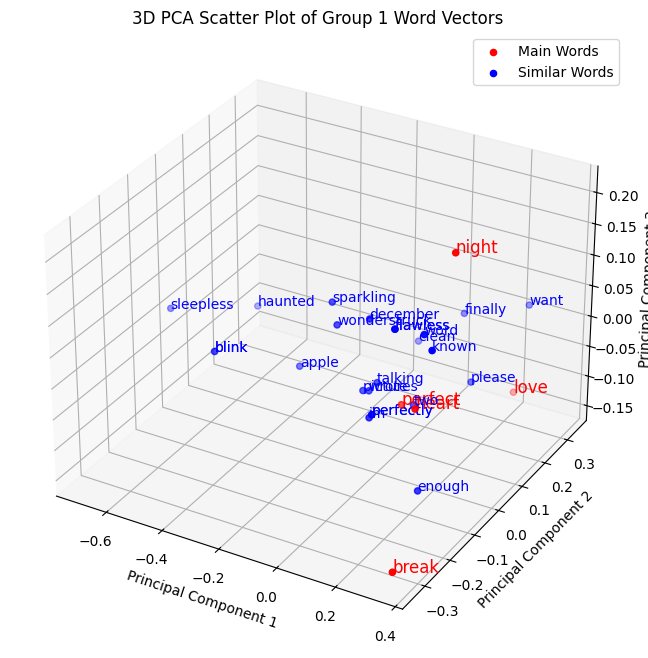

In [46]:
# Choose similar word of group1
group1_similar_love = [word for word, _ in similar_words_group1['love']]
group1_similar_break = [word for word, _ in similar_words_group1['break']]
group1_similar_perfect = [word for word, _ in similar_words_group1['perfect']]
group1_similar_night = [word for word, _ in similar_words_group1['night']]
group1_similar_heart = [word for word, _ in similar_words_group1['heart']]

main_words1 = ['love', 'break', 'perfect', 'night', 'heart']

similar_words1 = [word for sublist in [group1_similar_love, group1_similar_break, group1_similar_perfect, group1_similar_night, group1_similar_heart] for word in sublist]
all_words1 = main_words1 + [word for word in similar_words1 if word not in main_words1]

word_matrix1 = np.array([model1.wv[word] for word in all_words1])

pca1 = PCA(n_components=3)
pca_result1 = pca1.fit_transform(word_matrix1)

main_indices1 = [all_words1.index(word) for word in main_words1]
similar_indices1 = [i for i in range(len(all_words1)) if i not in main_indices1]

# Create 3D Graph
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result1[main_indices1, 0], pca_result1[main_indices1, 1], pca_result1[main_indices1, 2],
           marker='o', color='red', label="Main Words")
for i, word in enumerate(main_words1):
    ax.text(pca_result1[main_indices1[i], 0], pca_result1[main_indices1[i], 1], pca_result1[main_indices1[i], 2],
            word, color='red', fontsize=12)

ax.scatter(pca_result1[similar_indices1, 0], pca_result1[similar_indices1, 1], pca_result1[similar_indices1, 2],
           marker='o', color='blue', label="Similar Words")
for i, word in enumerate([all_words1[i] for i in similar_indices1]):
    ax.text(pca_result1[similar_indices1[i], 0], pca_result1[similar_indices1[i], 1], pca_result1[similar_indices1[i], 2],
            word, color='blue', fontsize=10)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot of Group 1 Word Vectors")
ax.legend()

plt.show()


# **6. Group 2**

In [47]:
similar_words_group2 = get_most_similar_words(model2, words_to_check)

print("🔹 **Top 5 most similar words in Group 2** 🔹")
for word, similar in similar_words_group2.items():
    print(f"\nTop 5 most similar to '{word}':")
    print(similar)

df2 = pd.DataFrame({
    'love_word': [word for word, _ in similar_words_group2['love']],
    'love_score': [score for _, score in similar_words_group2['love']],
    'break_word': [word for word, _ in similar_words_group2['break']],
    'break_score': [score for _, score in similar_words_group2['break']],
    'perfect_word': [word for word, _ in similar_words_group2['perfect']],
    'perfect_score': [score for _, score in similar_words_group2['perfect']],
    'night_word': [word for word, _ in similar_words_group2['night']],
    'night_score': [score for _, score in similar_words_group2['night']],
    'heart_word': [word for word, _ in similar_words_group2['heart']],
    'heart_score': [score for _, score in similar_words_group2['heart']]
})

# Show DataFrame
df2.index = range(1, 6)
df2

🔹 **Top 5 most similar words in Group 2** 🔹

Top 5 most similar to 'love':
[('boy', 0.9942036867141724), ('god', 0.9936544299125671), ("doin'", 0.9936297535896301), ('comes', 0.9934487342834473), ('colors', 0.9934080243110657)]

Top 5 most similar to 'break':
[('ladies', 0.9957020878791809), ('alone', 0.9956037998199463), ('getting', 0.9955575466156006), ('three', 0.9952443242073059), ('gone', 0.9950589537620544)]

Top 5 most similar to 'perfect':
[('windermere', 0.9967232942581177), ('wake', 0.9966696500778198), ('someone', 0.9966619610786438), ('fire', 0.9964224100112915), ('heaven', 0.9964063763618469)]

Top 5 most similar to 'night':
[('dreams', 0.9932093024253845), ('middle', 0.9912468791007996), ('dark', 0.9901983141899109), ('gotta', 0.9896787405014038), ("gon'", 0.9894816279411316)]

Top 5 most similar to 'heart':
[('feeling', 0.9979013204574585), ('album', 0.9978739023208618), ('blue', 0.9978102445602417), ("could've", 0.9976865649223328), ('told', 0.9976749420166016)]


,love_word,love_score,break_word,break_score,perfect_word,perfect_score,night_word,night_score,heart_word,heart_score
1,boy,0.994204,ladies,0.995702,windermere,0.996723,dreams,0.993209,feeling,0.997901
2,god,0.993654,alone,0.995604,wake,0.996670,middle,0.991247,album,0.997874
3,doin',0.993630,getting,0.995558,someone,0.996662,dark,0.990198,blue,0.997810
4,comes,0.993449,three,0.995244,fire,0.996422,gotta,0.989679,could've,0.997687
5,colors,0.993408,gone,0.995059,heaven,0.996406,gon',0.989482,told,0.997675


**3D Graph of Group 2**

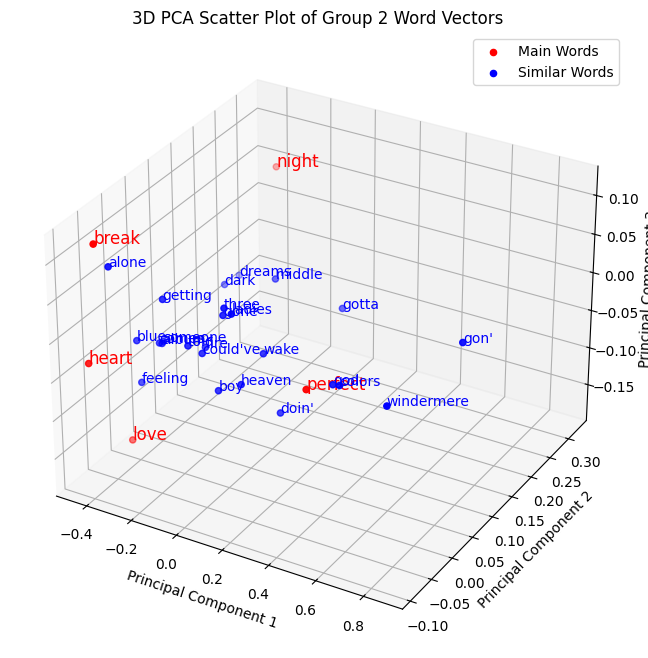

In [48]:
group2_similar_love = [word for word, _ in similar_words_group2['love']]
group2_similar_break = [word for word, _ in similar_words_group2['break']]
group2_similar_perfect = [word for word, _ in similar_words_group2['perfect']]
group2_similar_night = [word for word, _ in similar_words_group2['night']]
group2_similar_heart = [word for word, _ in similar_words_group2['heart']]

main_words2 = ['love', 'break', 'perfect', 'night', 'heart']

similar_words2 = [word for sublist in [group2_similar_love, group2_similar_break, group2_similar_perfect, group2_similar_night, group2_similar_heart] for word in sublist]
all_words2 = main_words2 + [word for word in similar_words2 if word not in main_words2]

word_matrix2 = np.array([model2.wv[word] for word in all_words2])

pca2 = PCA(n_components=3)
pca_result2 = pca2.fit_transform(word_matrix2)

main_indices2 = [all_words2.index(word) for word in main_words2]
similar_indices2 = [i for i in range(len(all_words2)) if i not in main_indices2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result2[main_indices2, 0], pca_result2[main_indices2, 1], pca_result2[main_indices2, 2],
           marker='o', color='red', label="Main Words")
for i, word in enumerate(main_words2):
    ax.text(pca_result2[main_indices2[i], 0], pca_result2[main_indices2[i], 1], pca_result2[main_indices2[i], 2],
            word, color='red', fontsize=12)

ax.scatter(pca_result2[similar_indices2, 0], pca_result2[similar_indices2, 1], pca_result2[similar_indices2, 2],
           marker='o', color='blue', label="Similar Words")
for i, word in enumerate([all_words2[i] for i in similar_indices2]):
    ax.text(pca_result2[similar_indices2[i], 0], pca_result2[similar_indices2[i], 1], pca_result2[similar_indices2[i], 2],
            word, color='blue', fontsize=10)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot of Group 2 Word Vectors")
ax.legend()

plt.show()
